<a href="https://colab.research.google.com/github/UmaNagirireddi/ML_Assignment5/blob/main/ml_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
temp_low = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
temp_high = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
temp_low = torch.tensor(temp_low)
temp_high = torch.tensor(temp_high)

In [3]:
def model(temp_high, w1, w2, b):
    return w2*temp_high**2 + w1*temp_high + b #w2 * temp_high ** 2 + w1 * temp_high + b.

In [4]:
def loss_fn(t_p, temp_low):
    squared_diffs = (t_p - temp_low)**2
    return squared_diffs.mean()

In [5]:
def training_loop(n_epochs, optimizer, params, temp_high, temp_low):
    for epoch in range(1, n_epochs + 1):
        t_p = model(temp_high, *params)
        loss = loss_fn(t_p, temp_low)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [6]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [7]:
t_un = 0.1 * temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 675.7944
Epoch 500, loss 2.7825
Epoch 1000, loss 2.4860
Epoch 1500, loss 2.2615
Epoch 2000, loss 2.1441
Epoch 2500, loss 2.1019
Epoch 3000, loss 2.0921
Epoch 3500, loss 2.0908
Epoch 4000, loss 2.0907
Epoch 4500, loss 2.0907
Epoch 5000, loss 2.0907


tensor([  2.4760,   0.2830, -10.6496], requires_grad=True)

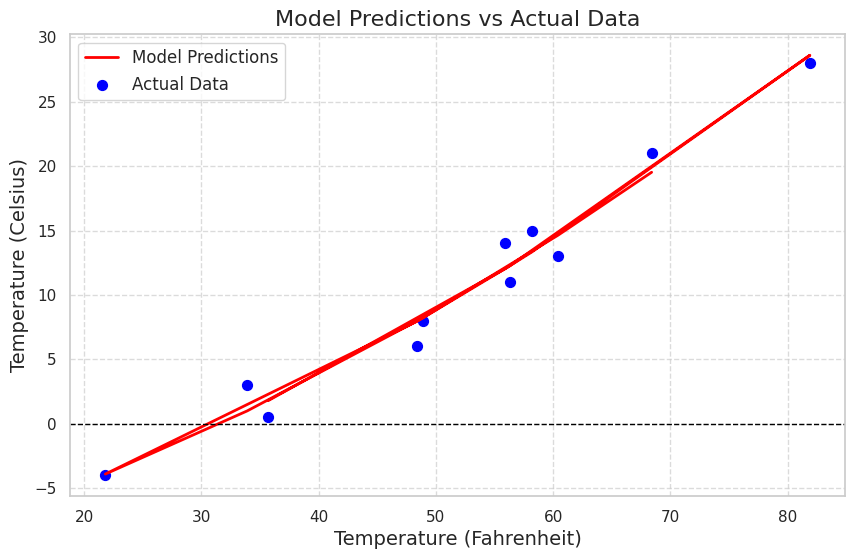

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 't_un' and 'params' as input
t_p = model(t_un, *params)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the model's predictions as a solid line with a red color
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', linewidth=2)

# Plot the actual data as points with a blue color and a marker style 'o'
plt.scatter(temp_high.numpy(), temp_low.numpy(), color='blue', label='Actual Data', marker='o', s=50)

# Add a legend to the plot
plt.legend()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)', fontsize=14)
plt.ylabel('Temperature (Celsius)', fontsize=14)

# Set the title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the appearance of the legend
plt.legend(fontsize=12, loc='upper left')

# Add a horizontal line at y=0 for better reference
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.show()


In [9]:
t_un = 0.1 * temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 675.7944
Epoch 500, loss 6.1112
Epoch 1000, loss 3.9368
Epoch 1500, loss 3.1178
Epoch 2000, loss 2.9318
Epoch 2500, loss 2.8713
Epoch 3000, loss 2.8129
Epoch 3500, loss 2.7441
Epoch 4000, loss 2.6647
Epoch 4500, loss 2.5764
Epoch 5000, loss 2.4825


tensor([ 0.4768,  0.4673, -5.6706], requires_grad=True)

In [10]:
t_un.numpy()

array([3.5700002, 5.59     , 5.82     , 8.190001 , 5.63     , 4.8900003,
       3.39     , 2.18     , 4.84     , 6.0400004, 6.84     ],
      dtype=float32)

In [11]:
t_p.detach().numpy()

array([ 1.7972012, 12.035997 , 13.348276 , 28.614595 , 12.262068 ,
        8.226366 ,  0.9969187, -3.9067006,  7.964863 , 14.631525 ,
       19.528837 ], dtype=float32)

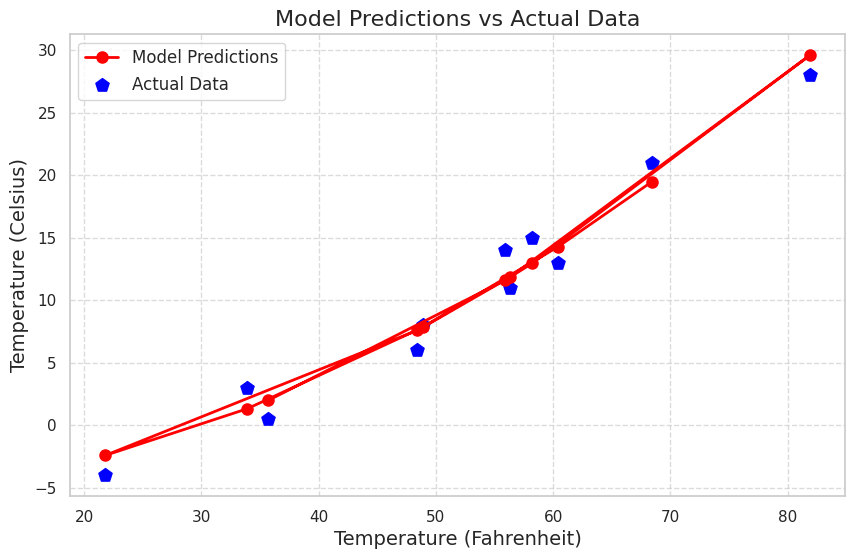

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 't_un' and 'params' as input
t_p = model(t_un, *params)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the model's predictions as a solid line with a red color and marker style 'o'
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', marker='o', markersize=8, linewidth=2)

# Plot the actual data as points with a blue color and marker style 'p'
plt.scatter(temp_high.numpy(), temp_low.numpy(), color='blue', label='Actual Data', marker='p', s=100)

# Add a legend to the plot
plt.legend()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)', fontsize=14)
plt.ylabel('Temperature (Celsius)', fontsize=14)

# Set the title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the appearance of the legend
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


In [13]:
t_un = 0.1 * temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 675.7944
Epoch 500, loss 103.7950
Epoch 1000, loss 13.0185
Epoch 1500, loss 8.0649
Epoch 2000, loss 7.6890
Epoch 2500, loss 7.2952
Epoch 3000, loss 6.8309
Epoch 3500, loss 6.3062
Epoch 4000, loss 5.7396
Epoch 4500, loss 5.1592
Epoch 5000, loss 4.6001


tensor([-0.0524,  0.4484, -1.7755], requires_grad=True)

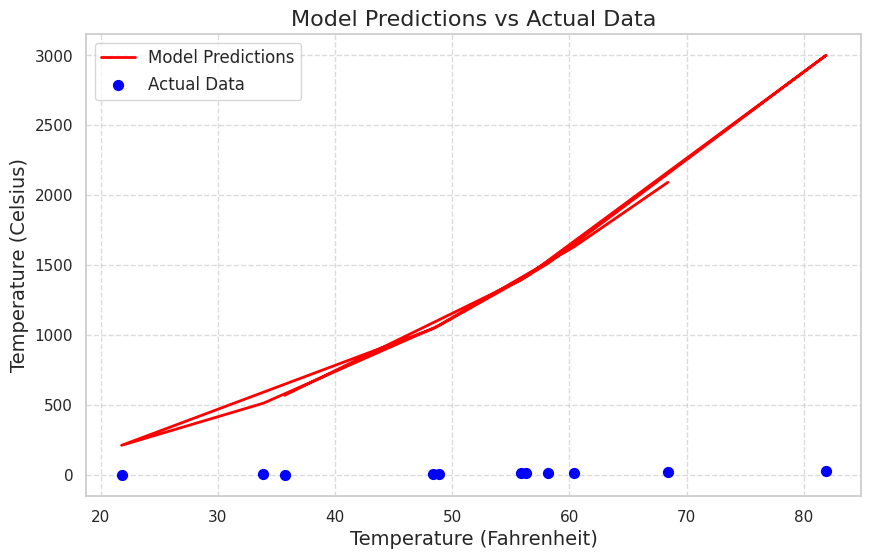

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 'temp_high' and 'params' as input
t_p = model(temp_high, *params)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the model's predictions in a line plot with a red color
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', linewidth=2)

# Plot the actual data as points with a blue color and a marker style 'o'
plt.scatter(temp_high.numpy(), temp_low.numpy(), color='blue', label='Actual Data', marker='o', s=50)

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)', fontsize=14)
plt.ylabel('Temperature (Celsius)', fontsize=14)

# Set the title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Add a legend to the plot
plt.legend()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the appearance of the legend
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


In [15]:

t_un = 0.1 * temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 675.7944
Epoch 500, loss 578.2527
Epoch 1000, loss 491.2365
Epoch 1500, loss 413.8677
Epoch 2000, loss 345.2539
Epoch 2500, loss 284.6672
Epoch 3000, loss 231.5106
Epoch 3500, loss 185.2833
Epoch 4000, loss 145.5521
Epoch 4500, loss 111.9216
Epoch 5000, loss 84.0093


tensor([ 0.5698,  0.5721, -0.4337], requires_grad=True)

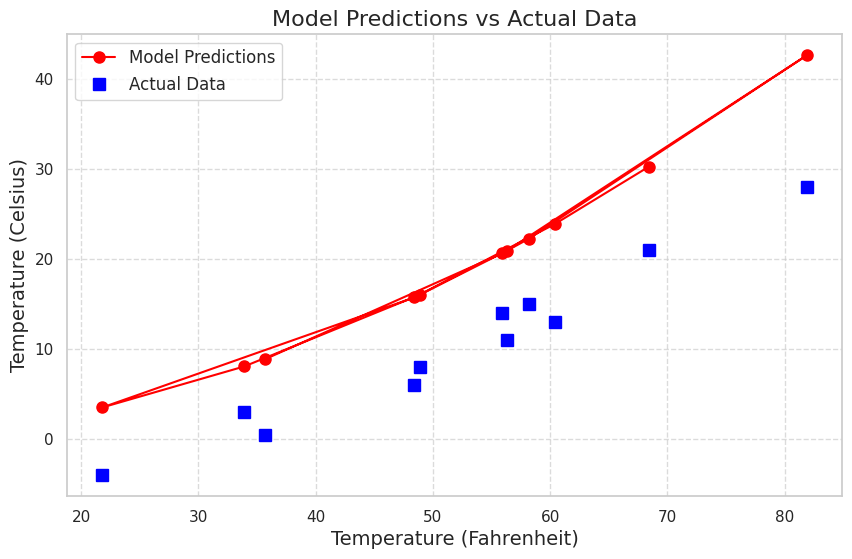

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 't_un' and 'params' as input
t_p = model(t_un, *params)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the model's predictions with a red line and circular markers
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', marker='o', markersize=8, linestyle='-')

# Plot the actual data as points with a blue color and square markers
plt.plot(temp_high.numpy(), temp_low.numpy(), 's', color='blue', label='Actual Data', markersize=8)

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)', fontsize=14)
plt.ylabel('Temperature (Celsius)', fontsize=14)

# Set the title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Add a legend to the plot
plt.legend()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the appearance of the legend
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


In [17]:
t_un = 0.1 * temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 675.7944
Epoch 500, loss nan
Epoch 1000, loss nan
Epoch 1500, loss nan
Epoch 2000, loss nan
Epoch 2500, loss nan
Epoch 3000, loss nan
Epoch 3500, loss nan
Epoch 4000, loss nan
Epoch 4500, loss nan
Epoch 5000, loss nan


tensor([nan, nan, nan], requires_grad=True)

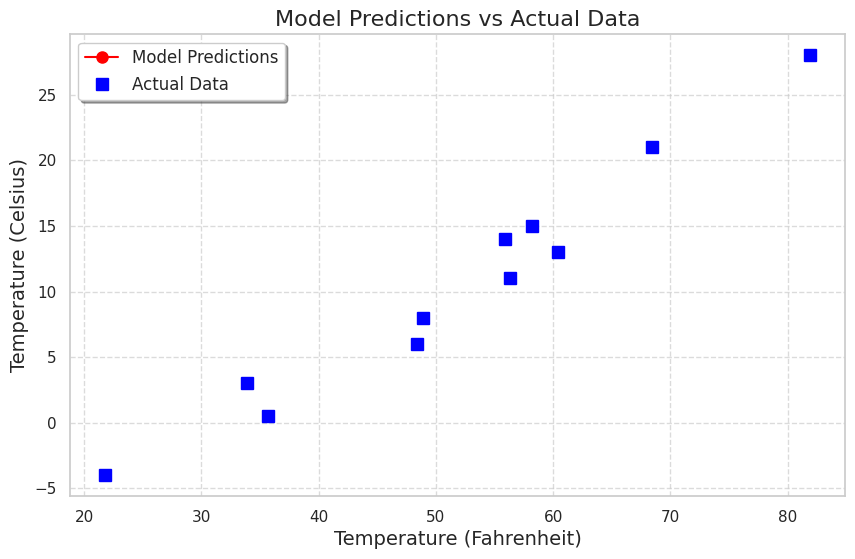

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 't_un' and 'params' as input
t_p = model(t_un, *params)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the model's predictions with a red line and circular markers
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', marker='o', markersize=8, linestyle='-')

# Plot the actual data as points with a blue color and square markers
plt.plot(temp_high.numpy(), temp_low.numpy(), 's', color='blue', label='Actual Data', markersize=8)

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)', fontsize=14)
plt.ylabel('Temperature (Celsius)', fontsize=14)

# Set the title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Add a legend to the plot with a shadow
plt.legend(fontsize=12, loc='upper left', shadow=True)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the appearance of the legend
plt.legend(fontsize=12, loc='upper left', shadow=True)

# Show the plot
plt.show()


In [19]:
t_un = temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 11709471.0000
Epoch 500, loss 203.5310
Epoch 1000, loss 202.9296
Epoch 1500, loss 202.3291
Epoch 2000, loss 201.7295
Epoch 2500, loss 201.1309
Epoch 3000, loss 200.5331
Epoch 3500, loss 199.9362
Epoch 4000, loss 199.3402
Epoch 4500, loss 198.7452
Epoch 5000, loss 198.1511


tensor([ 9.6692e-01, -1.1139e-02, -9.4794e-04], requires_grad=True)

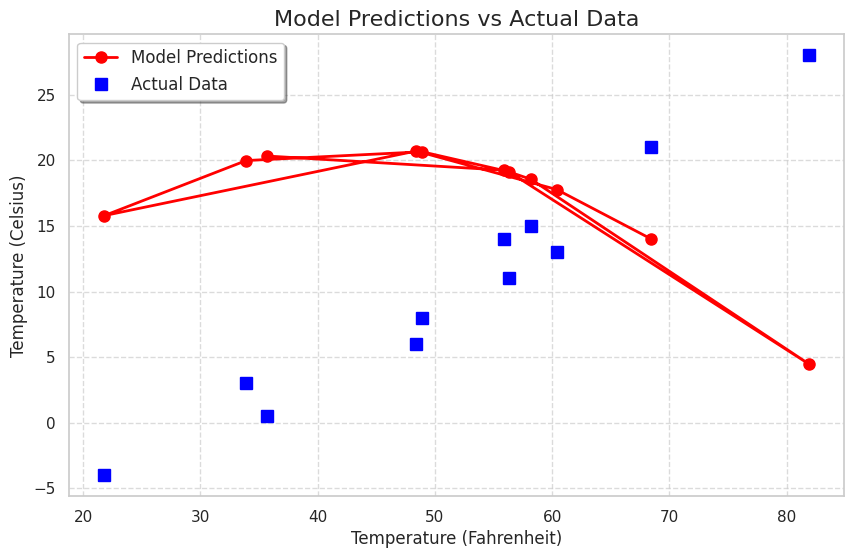

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is a function that takes 't_un' and 'params' as input
t_p = model(t_un, *params)

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions with a red line and circular markers
plt.plot(temp_high.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions', marker='o', markersize=8, linewidth=2)

# Plot the actual data as points with a blue color and square markers
plt.plot(temp_high.numpy(), temp_low.numpy(), 's', color='blue', label='Actual Data', markersize=8, linewidth=2)

# Add a legend with a shadow effect
plt.legend(fontsize=12, loc='upper left', shadow=True)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set a seaborn style for a more visually appealing plot
sns.set(style="whitegrid")

# Set a title for the plot
plt.title('Model Predictions vs Actual Data', fontsize=16)

# Show the plot
plt.show()


In [21]:
t_un = temp_high
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.00001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    temp_high = t_un,
    temp_low = temp_low)

Epoch 1, loss 11709471.0000
Epoch 500, loss nan
Epoch 1000, loss nan
Epoch 1500, loss nan
Epoch 2000, loss nan
Epoch 2500, loss nan
Epoch 3000, loss nan
Epoch 3500, loss nan
Epoch 4000, loss nan
Epoch 4500, loss nan
Epoch 5000, loss nan


tensor([nan, nan, nan], requires_grad=True)

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [23]:
#Use the URL for the raw CSV data
url = '/content/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
column_data = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
column_price = 'price'

In [25]:
scaler = MinMaxScaler()
df[column_data + [column_price]] = scaler.fit_transform(df[column_data + [column_price]])

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

data = df[column_data].values
price = df[[column_price]].values

In [27]:
data_t = torch.tensor(data)
price_t = torch.tensor(price)

In [28]:
data_t

tensor([[0.3966, 0.6000, 0.3333, 0.6667, 0.6667],
        [0.5024, 0.6000, 1.0000, 1.0000, 1.0000],
        [0.5711, 0.4000, 0.3333, 0.3333, 0.6667],
        ...,
        [0.1354, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0866, 0.4000, 0.0000, 0.0000, 0.0000],
        [0.1512, 0.4000, 0.0000, 0.3333, 0.0000]], dtype=torch.float64)

In [29]:
price_t

tensor([[1.0000],
        [0.9091],
        [0.9091],
        [0.9061],
        [0.8364],
        [0.7879],
        [0.7273],
        [0.7273],
        [0.7030],
        [0.6970],
        [0.6970],
        [0.6867],
        [0.6545],
        [0.6485],
        [0.6485],
        [0.6364],
        [0.6364],
        [0.6242],
        [0.6182],
        [0.6152],
        [0.6061],
        [0.6000],
        [0.5970],
        [0.5970],
        [0.5909],
        [0.5879],
        [0.5812],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5667],
        [0.5576],
        [0.5515],
        [0.5481],
        [0.5448],
        [0.5394],
        [0.5379],
        [0.5333],
        [0.5303],
        [0.5273],
        [0.5152],
        [0.5152],
        [0.5030],
        [0.5030],
        [0.5000],
        [0.4970],
        [0.4939],
        [0.4909],
        [0.4909],
        [0.4909],
        [0.4848],
        [0.4848],
        [0.4848],
        [0

In [30]:
def model(X, W, B):
    return torch.sum(X * W, dim=1) + B

In [31]:
weights = torch.ones(5)  # Consolidating W1, W2, W3, W4, W5 into a single tensor, because of 5 inputs
bias = torch.zeros(1)    # Bias as a single value

In [32]:
train_data, val_data, train_price, val_price = train_test_split(data, price, test_size=0.2, random_state=42)

In [33]:
train_data.shape, train_price.shape, val_data.shape, val_price.shape

((436, 5), (436, 1), (109, 5), (109, 1))

In [34]:
data_train = torch.tensor(train_data)
price_train =  torch.tensor(train_price)
data_val =  torch.tensor(val_data)
price_val =  torch.tensor(val_price)

In [35]:
def training_loop(n_epochs, optimizer, weights, bias, data_train, data_val, price_train, price_val):

    for epoch in range(1, n_epochs + 1):
        price_train_p = model(data_train, weights, bias)
        train_loss = loss_fn(price_train_p, price_train)

        price_val_p = model(data_train, weights, bias)
        val_loss = loss_fn(price_val_p, price_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return weights, bias

In [36]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)


Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([4.3523e-06, 4.4021e-06, 4.0123e-06, 4.2044e-06, 4.1834e-06],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [37]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 0.0266, Validation loss 0.0424
Epoch 1000, Training loss 0.0234, Validation loss 0.0389
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([ 1.1828e-07,  2.5502e-07, -6.8351e-08, -2.1430e-09,  6.7796e-09],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [38]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 0.2047, Validation loss 0.2117
Epoch 1000, Training loss 0.1061, Validation loss 0.1239
Epoch 1500, Training loss 0.0719, Validation loss 0.0899
Epoch 2000, Training loss 0.0487, Validation loss 0.0659
Epoch 2500, Training loss 0.0358, Validation loss 0.0524
Epoch 3000, Training loss 0.0297, Validation loss 0.0459
Epoch 3500, Training loss 0.0270, Validation loss 0.0428
Epoch 4000, Training loss 0.0254, Validation loss 0.0411
Epoch 4500, Training loss 0.0244, Validation loss 0.0400
Epoch 5000, Training loss 0.0237, Validation loss 0.0393


(tensor([ 0.0522,  0.1781, -0.0672, -0.0236, -0.0105], requires_grad=True),
 tensor([0.1860], requires_grad=True))

In [39]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 1.1064, Validation loss 1.0777
Epoch 1000, Training loss 0.9080, Validation loss 0.8847
Epoch 1500, Training loss 0.7402, Validation loss 0.7219
Epoch 2000, Training loss 0.5992, Validation loss 0.5858
Epoch 2500, Training loss 0.4823, Validation loss 0.4735
Epoch 3000, Training loss 0.3869, Validation loss 0.3825
Epoch 3500, Training loss 0.3107, Validation loss 0.3104
Epoch 4000, Training loss 0.2516, Validation loss 0.2551
Epoch 4500, Training loss 0.2072, Validation loss 0.2143
Epoch 5000, Training loss 0.1752, Validation loss 0.1854


(tensor([0.6064, 0.6119, 0.5784, 0.5884, 0.5866], requires_grad=True),
 tensor([-0.3670], requires_grad=True))

In [40]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 0.0235, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([ 5.8444e-07,  1.6221e-06, -6.0470e-07, -4.4821e-08,  3.9729e-08],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [41]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 0.0900, Validation loss 0.1071
Epoch 1000, Training loss 0.0447, Validation loss 0.0610
Epoch 1500, Training loss 0.0326, Validation loss 0.0485
Epoch 2000, Training loss 0.0284, Validation loss 0.0441
Epoch 2500, Training loss 0.0263, Validation loss 0.0420
Epoch 3000, Training loss 0.0252, Validation loss 0.0407
Epoch 3500, Training loss 0.0245, Validation loss 0.0400
Epoch 4000, Training loss 0.0240, Validation loss 0.0395
Epoch 4500, Training loss 0.0237, Validation loss 0.0392
Epoch 5000, Training loss 0.0235, Validation loss 0.0390


(tensor([ 0.0912,  0.0961,  0.0113, -0.0293, -0.0281], requires_grad=True),
 tensor([0.2086], requires_grad=True))

In [42]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 0.3233, Validation loss 0.3281
Epoch 1000, Training loss 0.2274, Validation loss 0.2421
Epoch 1500, Training loss 0.1964, Validation loss 0.2136
Epoch 2000, Training loss 0.1733, Validation loss 0.1909
Epoch 2500, Training loss 0.1536, Validation loss 0.1712
Epoch 3000, Training loss 0.1368, Validation loss 0.1543
Epoch 3500, Training loss 0.1223, Validation loss 0.1397
Epoch 4000, Training loss 0.1099, Validation loss 0.1271
Epoch 4500, Training loss 0.0992, Validation loss 0.1163
Epoch 5000, Training loss 0.0900, Validation loss 0.1070


(tensor([0.6123, 0.5272, 0.5757, 0.2545, 0.2784], requires_grad=True),
 tensor([-0.3091], requires_grad=True))

In [43]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    data_train = data_train,
    data_val = data_val,
    price_train = price_train,
    price_val = price_val)

Epoch 500, Training loss 1.0859, Validation loss 1.0583
Epoch 1000, Training loss 0.8918, Validation loss 0.8700
Epoch 1500, Training loss 0.7430, Validation loss 0.7263
Epoch 2000, Training loss 0.6288, Validation loss 0.6166
Epoch 2500, Training loss 0.5409, Validation loss 0.5326
Epoch 3000, Training loss 0.4732, Validation loss 0.4683
Epoch 3500, Training loss 0.4207, Validation loss 0.4188
Epoch 4000, Training loss 0.3800, Validation loss 0.3806
Epoch 4500, Training loss 0.3482, Validation loss 0.3510
Epoch 5000, Training loss 0.3231, Validation loss 0.3280


(tensor([0.8369, 0.7544, 0.8998, 0.7654, 0.7854], requires_grad=True),
 tensor([-0.4963], requires_grad=True))